<a href="https://colab.research.google.com/github/tariqzahratahdi/DataScience/blob/main/course_seaborn_statistical_estimation_and_error_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical estimation and error bars

Statistical estimation involves reducing multiple data points to a summary statistic such as the mean or median.

When showing a summary statistic, it is usually appropriate to add *error bars*, which provide a visual cue about how well the summary represents the underlying data points.

In seaborn, there are two approaches for constructing each kind of error bar.

One approach is parametric, using a formula that relies on assumptions about the shape of the distribution.

The other approach is nonparametric, using only the data that you provide.

course-seaborn-statistical-estimation-and-error-bars-00.svg

Standard deviation
<br><br>
$\sigma = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n}}$
<br><br>
Standard error
<br><br>
$SE = \frac{\sigma}{\sqrt{n}}$
<br><br>
where
* $x$  is a data point in the dataset
* $\bar{x}$ is the mean of the dataset
* $n$ is the number of data points in the dataset.

The size parameter is defined differently for the parametric and nonparametric approaches.

For parametric error bars, it is a scalar factor that is multiplied by the statistic defining the error (standard error or standard deviation).

For nonparametric error bars, it is a percentile width.

To compare the different parameterizations, we’ll use the following helper function:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

# Measures of data spread

## Standard deviation error bars

By default, `errorbar="sd"` will draw error bars at +/- 1 sd around the estimate, but the range can be increased by passing a scaling size parameter.

Note that, assuming normally-distributed data, ~68% of the data will lie within one standard deviation, ~95% will lie within two, and ~99.7% will lie within three.

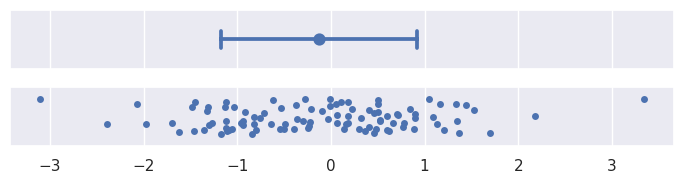

In [ ]:
plot_errorbars("sd")

## Percentile interval error bars

Percentile intervals also represent the range where some amount of the data fall, but they do so by computing those percentiles directly from your sample.

By default, `errorbar="pi"` will show a 95% interval, ranging from the 2.5 to the 97.5 percentiles.

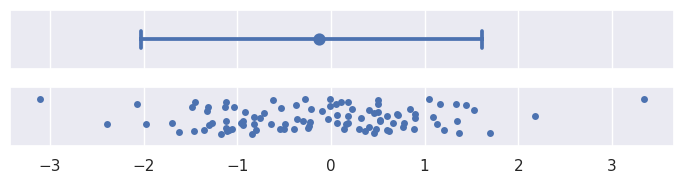

In [ ]:
plot_errorbars("pi")

You can choose a different range by passing a size parameter, e.g., to show the inter-quartile range.

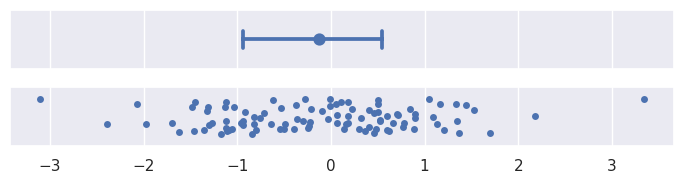

In [ ]:
plot_errorbars(("pi", 50))

# Measures of estimate uncertainty

If your data are a random sample from a larger population, then the mean (or other estimate) will be an imperfect measure of the true population average.

Error bars that show estimate uncertainty try to represent the range of likely values for the true parameter.

## Standard error bars

The standard error statistic is related to the standard deviation: in fact it is just the standard deviation divided by the square root of the sample size.

The default, with `errorbar="se"`, draws an interval +/-1 standard error from the mean.

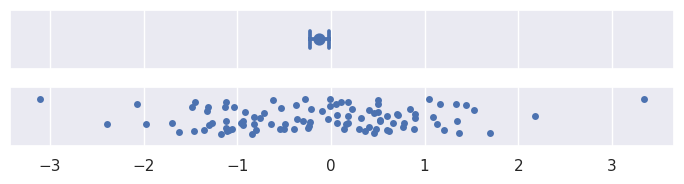

In [ ]:
plot_errorbars("se")

## Confidence interval error bars

The nonparametric approach to representing uncertainty uses bootstrapping: a procedure where the dataset is randomly resampled with replacement a number of times, and the estimate is recalculated from each resample.

This procedure creates a distribution of statistics approximating the distribution of values that you could have gotten for your estimate if you had a different sample.

The confidence interval is constructed by taking a percentile interval of the bootstrap distribution.

By default `errorbar="ci"` draws a 95% confidence interval.

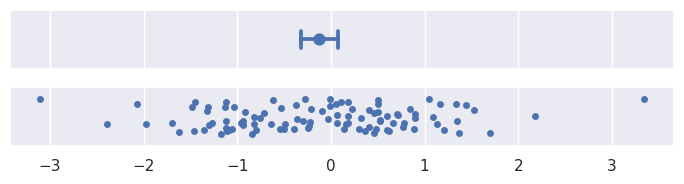

In [ ]:
plot_errorbars("ci")

# Error bars on regression fits

Error bars also arise in seaborn when estimating regression models to visualize relationships.

Here, the error bars will be represented by a “band” around the regression line.

